# Detecting mislabeled examples with outlier detectors

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

from mislabeled.detect.detectors import OutlierDetector
from mislabeled.tests.utils import blobs_1_mislabeled

/var/folders/65/rv76bdzx3sv0m6rwzx__cds40000gn/T/ipykernel_30875/715554498.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X[ind, 0], X[ind, 1], "bo", markersize=15, fillstyle="none", color="red")


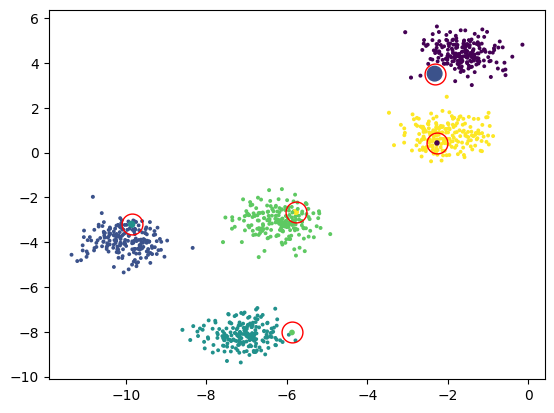

In [5]:
detector = OutlierDetector(
    make_pipeline(StandardScaler(), OneClassSVM(gamma=0.02, nu=0.5))
)
n_classes = 5

X, y, indices_mislabeled = blobs_1_mislabeled(n_classes)

trust_scores = detector.trust_score(X, y)

selected_untrusted = np.argsort(trust_scores)[:n_classes]

plt.scatter(
    X[:, 0], X[:, 1], c=y, s=(1 / trust_scores) * np.mean(1 / trust_scores) * 1000
)

indices = np.argsort(trust_scores)
for i in range(n_classes):
    ind = indices[i]
    plt.plot(X[ind, 0], X[ind, 1], "o", markersize=15, fillstyle="none", color="red")
plt.show()